In [107]:
import pandas as pd
import statistics as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from haversine import haversine,Unit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [108]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [109]:
df2 = df.drop(['Unnamed: 0', 'key'], axis=1)
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [110]:
df2.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [111]:
df2.shape

(200000, 7)

In [112]:
df2.dropna()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [113]:
df2 = df2[
    df2['pickup_latitude'].between(-90,90) &
    df2['dropoff_latitude'].between(-90,90) &
    df2['dropoff_longitude'].between(-180,180) &
    df2['pickup_longitude'].between(-180,180) 
]

In [114]:
df2["Distance"] = df2.apply(lambda x : haversine(
    (x['pickup_latitude'], x['pickup_longitude']),
    (x['dropoff_latitude'], x['dropoff_longitude']),
    unit=Unit.KILOMETERS
), axis=1)

In [115]:
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


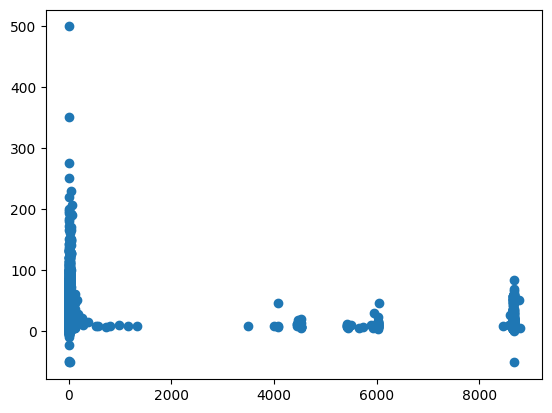

In [116]:
plt.scatter(df2['Distance'], df2['fare_amount'])

In [117]:
df2.query("0 < Distance and fare_amount > 0")

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875053
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850337
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539720


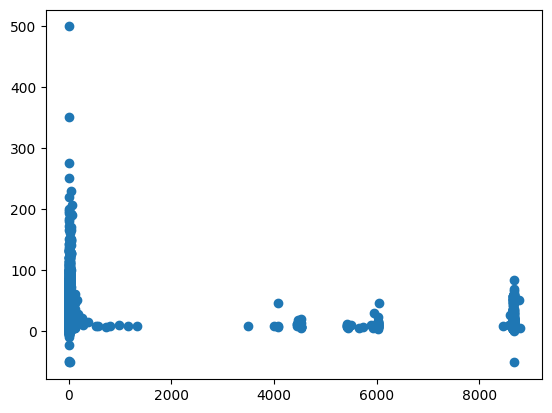

In [118]:
plt.scatter(df2['Distance'], df2['fare_amount'])

In [119]:
df2 = df2.query("0 < Distance <= 60 and fare_amount > 0 and not ((Distance < 1 and fare_amount > 100) or (Distance > 100 and fare_amount < 100))")

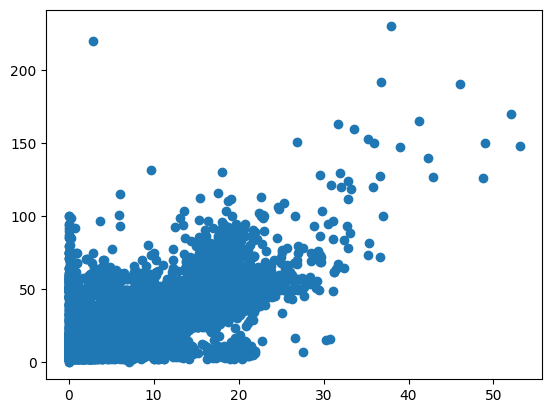

In [120]:
plt.scatter(df2['Distance'], df2['fare_amount'])

In [121]:
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])

In [122]:
df2['Year'] = df2['pickup_datetime'].dt.year
df2['Month'] = df2['pickup_datetime'].dt.month
df2['Date'] = df2['pickup_datetime'].dt.day
df2['Day_of_week_num'] = df2['pickup_datetime'].dt.day_of_week
df2['Day_of_week'] = df2['pickup_datetime'].dt.day_name().str[:3]
df2['hour'] = df2['pickup_datetime'].dt.hour

df2['Counter'] = 1

df2['pickup'] = df2['pickup_latitude'].astype(str) + ',' + df2['pickup_longitude'].astype(str)
df2['dropoff'] = df2['dropoff_latitude'].astype(str) + ',' + df2['dropoff_longitude'].astype(str)

In [123]:
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day_of_week_num,Day_of_week,hour,Counter,pickup,dropoff
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,2015,5,7,3,Thu,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,2009,7,17,4,Fri,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,2009,8,24,0,Mon,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,2009,6,26,4,Fri,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,2014,8,28,3,Thu,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


<BarContainer object of 7 artists>

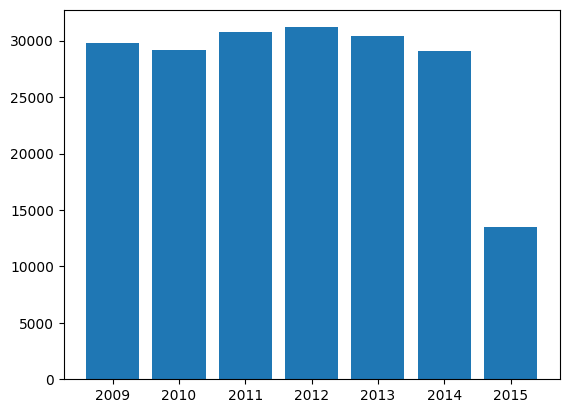

In [124]:
plt.bar([2009,2010,2011,2012,2013,2014,2015],df2.groupby('Year')['Counter'].sum())



<BarContainer object of 12 artists>

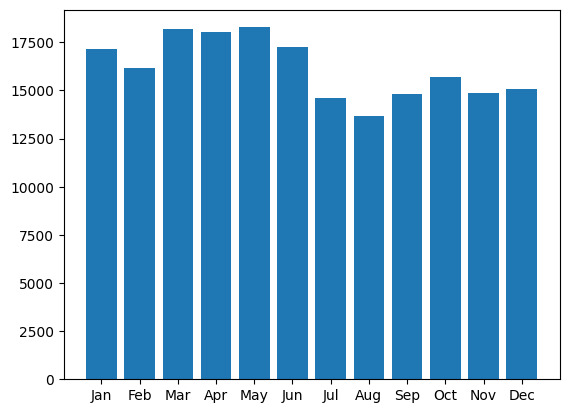

In [125]:
plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', "Nov", 'Dec'],df2.groupby('Month')['Counter'].sum())

<BarContainer object of 7 artists>

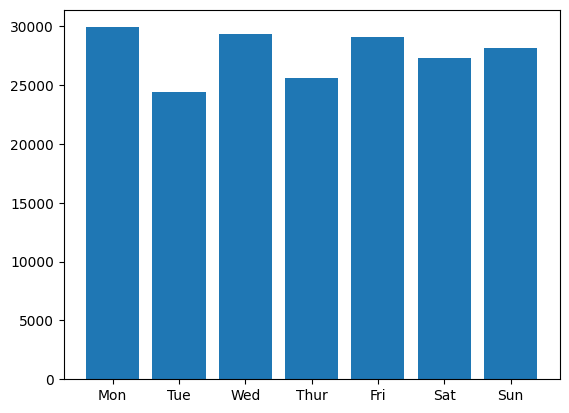

In [126]:
plt.bar(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],df2.groupby('Day_of_week')['Counter'].sum())

In [127]:
df_1 = df2[['Distance', 'hour', 'Day_of_week_num']].copy()

df_h = df_1.copy()

df_h = df_h.groupby(['hour', 'Day_of_week_num']).mean()
df_h = df_h.unstack(level=0)

([<matplotlib.axis.XTick at 0x270f5ac2d70>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thur'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

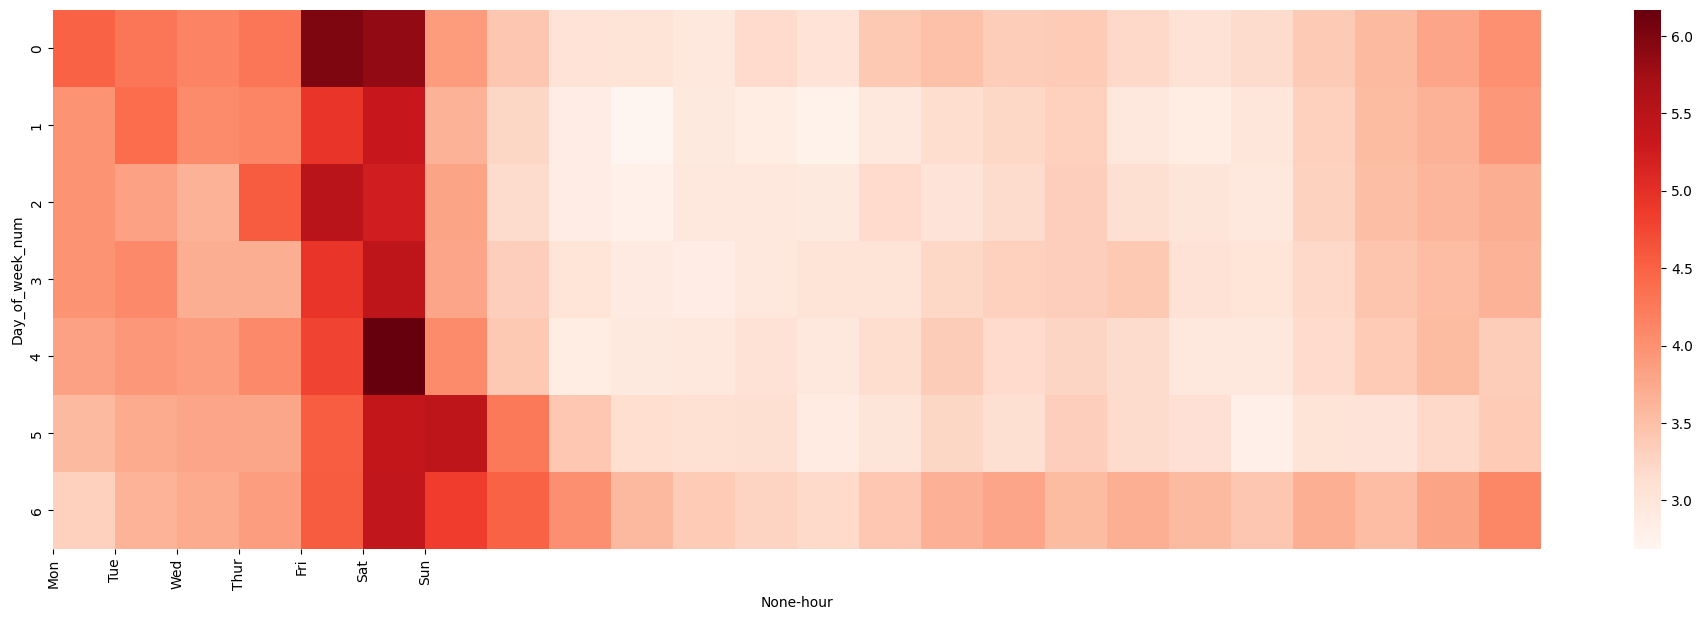

In [128]:
plt.subplots(figsize=(24,7))

x_ticks = ['12 am', '1 am', '2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']
y_ticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

sns.heatmap(df_h, cmap='Reds')

plt.xticks(np.arange(24),labels=x_ticks)
plt.xticks(np.arange(7),labels=y_ticks)

In [129]:
X = df2['Distance'].values.reshape(-1,1)
y = df2['fare_amount'].values.reshape(-1,1)


In [130]:
X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

In [142]:
linear_model = LinearRegression()

In [143]:
linear_model.fit(X_train,  y_train)

LinearRegression()

In [144]:
y_pred = linear_model.predict(X_test)

In [135]:
print(y_test, y_pred)

[[-0.29598485]
 [ 2.04113598]
 [-0.42158024]
 ...
 [-0.08665921]
 [-0.0343278 ]
 [-0.42158024]] [[-0.3748853 ]
 [ 1.69058278]
 [-0.22570206]
 ...
 [-0.5329182 ]
 [-0.33655301]
 [-0.41868684]]


In [136]:
from sklearn import metrics

In [137]:
print("RMSE : " , metrics.root_mean_squared_error(y_test, y_pred))
print("MSE : " , metrics.mean_squared_error(y_test, y_pred))
print("AE : " , metrics.mean_absolute_error(y_test, y_pred))

RMSE :  0.4713711601953735
MSE :  0.22219077066393247
AE :  0.24474254052760716


In [138]:
random_forest = RandomForestRegressor(n_estimators=100)


In [139]:
random_forest.fit(X_train, y_train, )

c:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

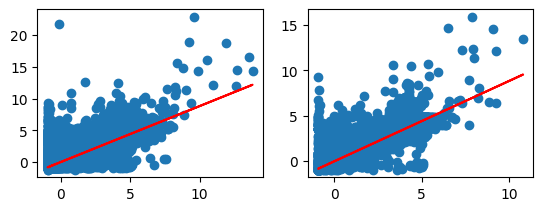

In [145]:
plt.subplot(2,2,1)
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_model.predict(X_train), color = 'red')


plt.subplot(2,2,2)
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_model.predict(X_test), color = 'red')

